# Camparison through Image classification of brain tumor with two algorithms SVM(Support Vector Machine) and Logistic Regression

In [1]:
## Importin essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import os

In [3]:
## Load the data set
path= r"C:\Users\AAKASH\Downloads\archive (7)\Training"
print(os.listdir(path))
classes={'no_tumor':0,'pituitary_tumor':1,'galioma_tumor':3,'meningioma_tumor':4}

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2

In [6]:
import cv2
import os

X = []
Y = []
classes = {'no_tumor': 0, 'pituitary_tumor': 1, 'glioma_tumor': 2, 'meningioma_tumor': 3}

path = r"C:\Users\AAKASH\Downloads\archive (7)\Training"

for cls in os.listdir(path):
    # Append the class name to the path
    class_path = os.path.join(path, cls)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path, 0)  # Read the image in grayscale (0)
        img = cv2.resize(img, (200, 200))  # Resize the image to 1000x1000
        X.append(img)
        Y.append(classes[cls])

In [7]:
X = np.array(X)
Y = np.array(Y)

In [8]:
np.unique(Y)

array([0, 1, 2, 3])

In [9]:
pd.Series(Y).value_counts()

1    827
2    826
3    822
0    395
dtype: int64

In [10]:
X.shape

(2870, 200, 200)

# Visualisation

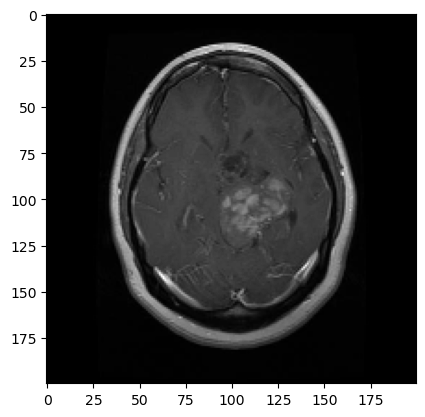

In [11]:
plt.imshow(X[0], cmap='gray')

In [12]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2870, 40000)

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [14]:
xtrain.shape, xtest.shape

((2296, 40000), (574, 40000))

In [15]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [16]:
from sklearn.decomposition import PCA

In [17]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
pca_train = xtrain
pca_test = xtest

(2296, 40000) (574, 40000)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [19]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [20]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [21]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 0.9982578397212544
Testing Score: 0.789198606271777


In [22]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9403310104529616
Testing Score: 0.818815331010453


In [23]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([  0,   1,   9,  11,  15,  18,  23,  28,  34,  37,  54,  55,  57,
         65,  66,  67,  72,  79,  82,  84,  87,  94,  98, 110, 116, 117,
        118, 119, 123, 133, 148, 184, 185, 187, 190, 191, 193, 194, 196,
        201, 204, 206, 208, 209, 211, 214, 219, 225, 229, 233, 236, 239,
        260, 261, 266, 272, 273, 274, 278, 288, 300, 304, 305, 308, 318,
        319, 320, 339, 349, 353, 361, 365, 374, 387, 393, 403, 416, 420,
        422, 423, 424, 432, 439, 444, 453, 457, 470, 472, 473, 475, 486,
        489, 507, 508, 512, 522, 526, 528, 529, 532, 539, 543, 557, 568],
       dtype=int64),)

In [26]:
dec = {0:'No Tumor', 1:'Positive Tumor',2: 'glioma_tumor', 3: 'meningioma_tumor'}

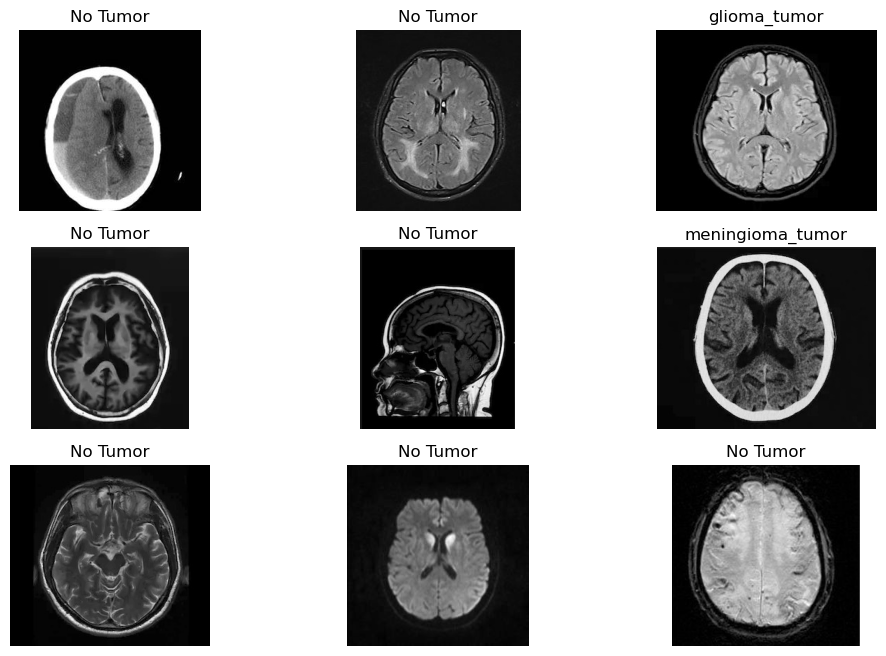

In [32]:
import os
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
p = os.listdir(r'C:\\Users\\acer\\Desktop\\data111\\Testing\\')
c = 1
for i in os.listdir(r'C:\\Users\\acer\\Desktop\\data111\\Testing\\no_tumor\\')[:9]:
    plt.subplot(3, 3, c)
    
    img = cv2.imread(r'C:\\Users\\acer\\Desktop\\data111\\Testing\\no_tumor\\'+ i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

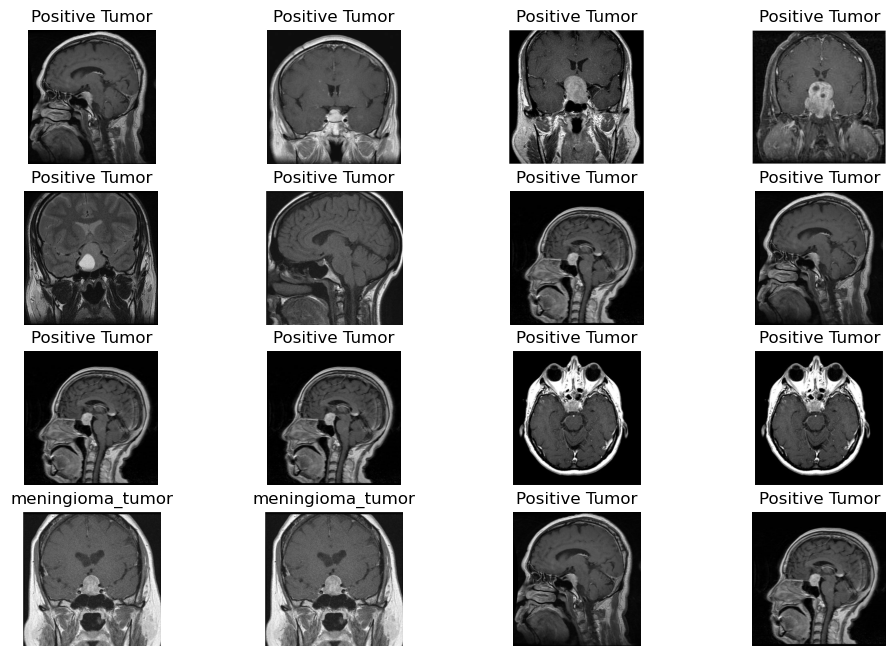

In [35]:
import os
import cv2
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
p = os.listdir(r'C:\\Users\\AAKASH\\Download\\data111\\Testing\\')
c = 1
for i in os.listdir(r'C:\Users\AAKASH\Download\data111\Testing\pituitary_tumor')[:16]:
    plt.subplot(4, 4, c)
    
    img = cv2.imread(r'C:\Users\AAKASH\Download\data111\Testing\pituitary_tumor\\' + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1